**Chess Piece image classifier**

In [1]:
## make sure fastai is up to date 
!curl -s https://course.fast.ai/setup/colab | bash

bash: line 1: syntax error near unexpected token `newline'
bash: line 1: `<!DOCTYPE html>'


In [2]:
## read in standard data science libs
import matplotlib.pyplot as plt

## import google drive package
from  google.colab import drive

## import the fastai library
from fastai.vision import *

In [5]:
## connect workbook to google drive folder to access images 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
## save path to project folder 
root_path = '/content/drive/My Drive/ChessProject'

In [7]:
## save path for pieces folder that contains images 
proj_path = 'drive/My Drive/ChessProject/Classifier/Pieces'

In [9]:
## save fastai path 
p_path = Path(proj_path)

In [10]:
## create image data bunch with 80/20 train test split 
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=200, num_workers=4).normalize(imagenet_stats)

In [11]:
data.classes

['bishop', 'king', 'knight', 'pawn', 'queen', 'rook']

In [ ]:
## show sample of images 
# data.show_batch(rows=3,figsize=(7,8))

In [13]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['bishop', 'king', 'knight', 'pawn', 'queen', 'rook'], 6, 1157, 289)

In [14]:
## create cnn_learner object
## use resnet 50 for transfer learning
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/hub/checkpoints/resnet50-19c8e357.pth


In [31]:
## train 30 epochs of the model 
learn.fit_one_cycle(30)

epoch,train_loss,valid_loss,error_rate,time
0,0.068158,0.317325,0.100346,00:13
1,0.060445,0.321925,0.093426,00:12
2,0.057282,0.316902,0.089965,00:12
3,0.056667,0.309709,0.096886,00:12
4,0.061098,0.349441,0.093426,00:12
5,0.071683,0.372135,0.114187,00:12
6,0.114490,0.478622,0.131488,00:12
7,0.138864,0.474020,0.117647,00:12
8,0.147104,0.340740,0.096886,00:12
9,0.131879,0.366789,0.103806,00:12


Best values found for epochs for Resnet50:

*   epoch 20 :  0.077374  |  0.226988 |  0.055363
*   **epoch 30 : 0.023039 |  0.249287 |	0.072664**
*   epoch 40 :	0.041132  |	 0.345383 |	0.096886

Resnet34 was not giving expected output. Resnet50 with 30 epochs was the best that I could find.

In [47]:
## save model
learn.save('model1_50', return_path=True)
# learn.save('model_50_bestfit', return_path=True) # 0.023039	0.249287	0.072664

PosixPath('drive/My Drive/ChessProject/Classifier/Pieces/models/model_50_bestfit.pth')

In [33]:
## unfreeze model. Lets you train earlier layers. Then find optimal learning rates 
# learn.unfreeze()
# learn.lr_find()  
# learn.recorder.plot()

In [34]:
## fit whole model with new learning rates 
# learn.fit_one_cycle(2, max_lr=slice(1e-06,1e-3), wd=.001)
# learn.freeze()
# learn.lr_find()
# learn.recorder.plot()
# learn.recorder.plot_losses()

In [35]:
# learn.save('model2_50')

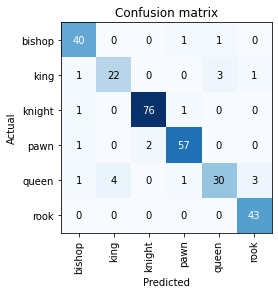

In [48]:
# learn.load('model_50_bestfit')
learn.load('model_50')
interp = ClassificationInterpretation.from_learner(learn)

## plot results of model on validation set 
interp.plot_confusion_matrix()

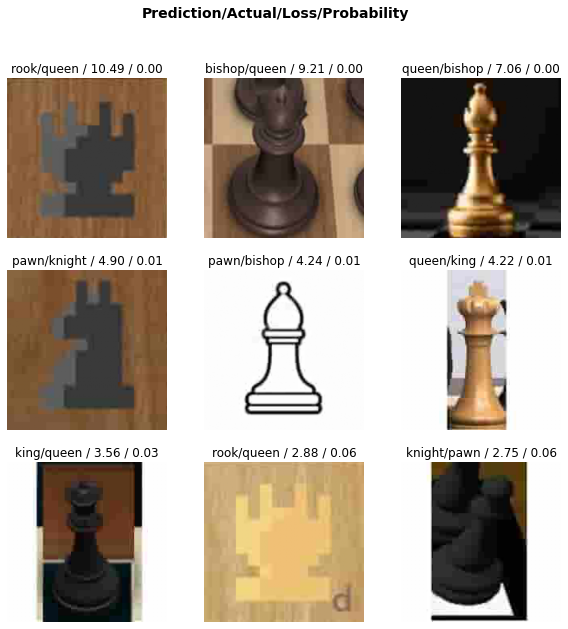

In [37]:
## plot top losses (most wrong)
interp.plot_top_losses(9, figsize=(10,10))

**Predicting test cases:**

In [38]:
import os
import math
import matplotlib.image as mpimg

## Function to loop through all images from received folder, predict the peices and show the predictions
def showAndPredictFromFolder(folder_name):
  images = []
  titles = []
  for filename in os.listdir(Path(root_path)/folder_name):
    p = Path(root_path)/folder_name/filename
    img_fa = open_image(p)
    img_mp = mpimg.imread(p)
    pred_class,pred_idx,outputs = learn.predict(img_fa)
    images.append(img_mp)
    titles.append(pred_class.obj)

  n_images = len(images)
  n_col = 4
  n_row = math.ceil(n_images/n_col)

  _, axs = plt.subplots(n_row, n_col, figsize=(8, 8))
  axs = axs.flatten()
  for img,title, ax in zip(images, titles, axs):
      ax.set_title(title)
      ax.imshow(img)
      ax.set_axis_off()
  plt.show()



**3D chess set from online chess site**



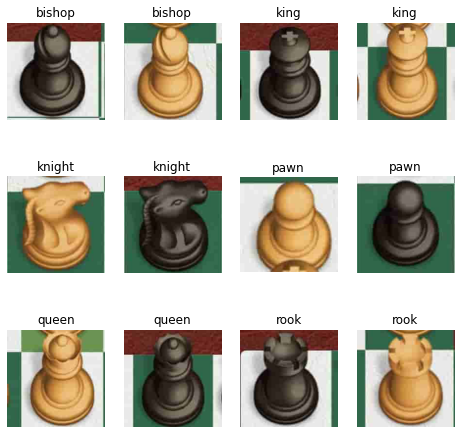

In [49]:
showAndPredictFromFolder('TestSets/test1')

**2D chess set from online chess site**

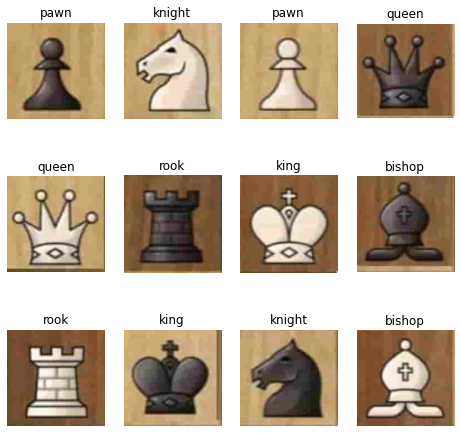

In [50]:
showAndPredictFromFolder('TestSets/test2')

**Pawn Variations**

In [51]:
# showAndPredictFromFolder('TestSets/test3')

**Bishop Variations**

In [52]:
# showAndPredictFromFolder('TestSets/test4')

**Knight Variations**

In [53]:
# showAndPredictFromFolder('TestSets/test5')

**Rook Variations**

In [54]:
# showAndPredictFromFolder('TestSets/test6')

**King Variations**

In [55]:
# showAndPredictFromFolder('TestSets/test7')

**Queen Variations**

In [56]:
# showAndPredictFromFolder('TestSets/test8')